In [10]:
from src.main import *
from src.main import load_dataset, create_mask, create_super_sample, create_kmeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

/tmp/ipykernel_24747/492981209.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fx, plots = plt.subplots(1, 2, figsize=(20,10))


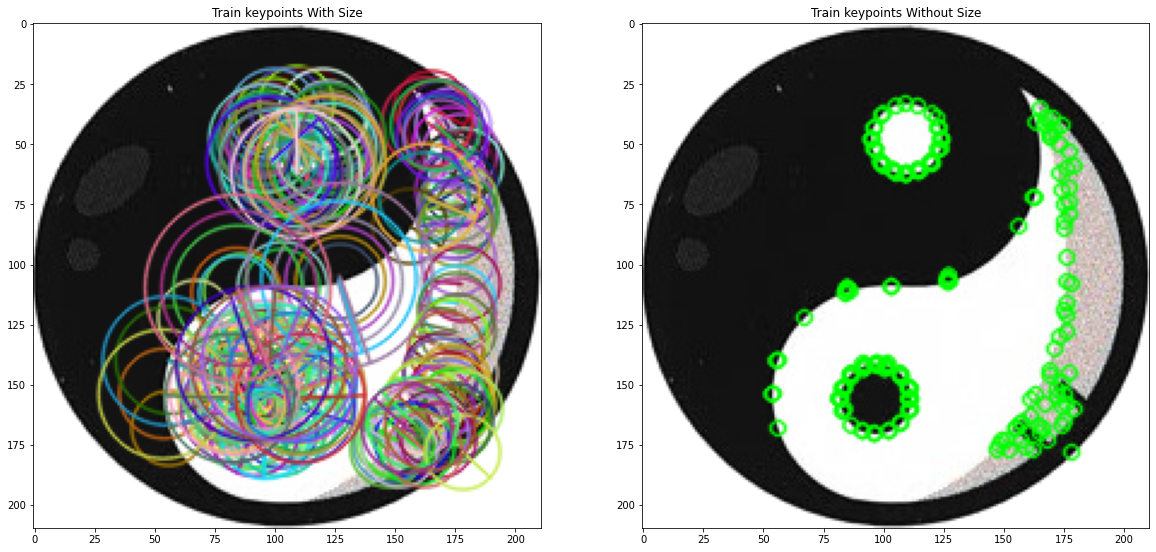

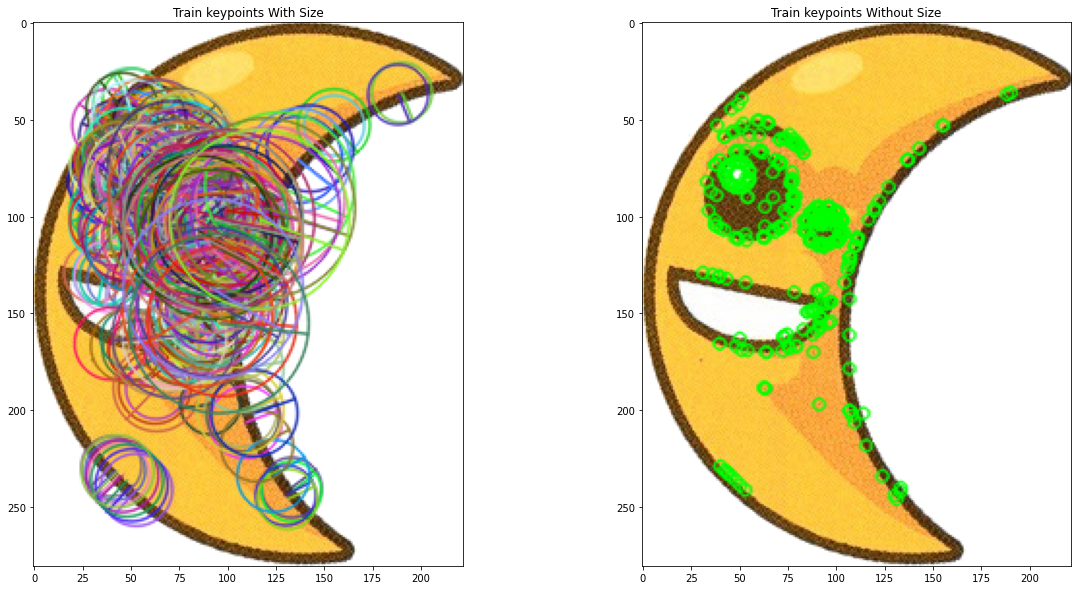

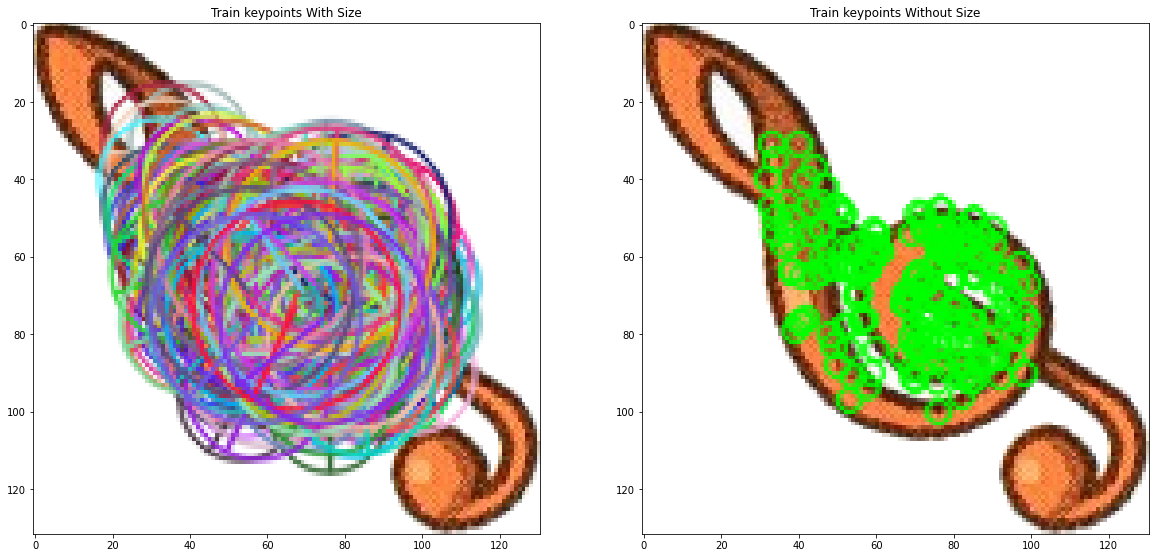

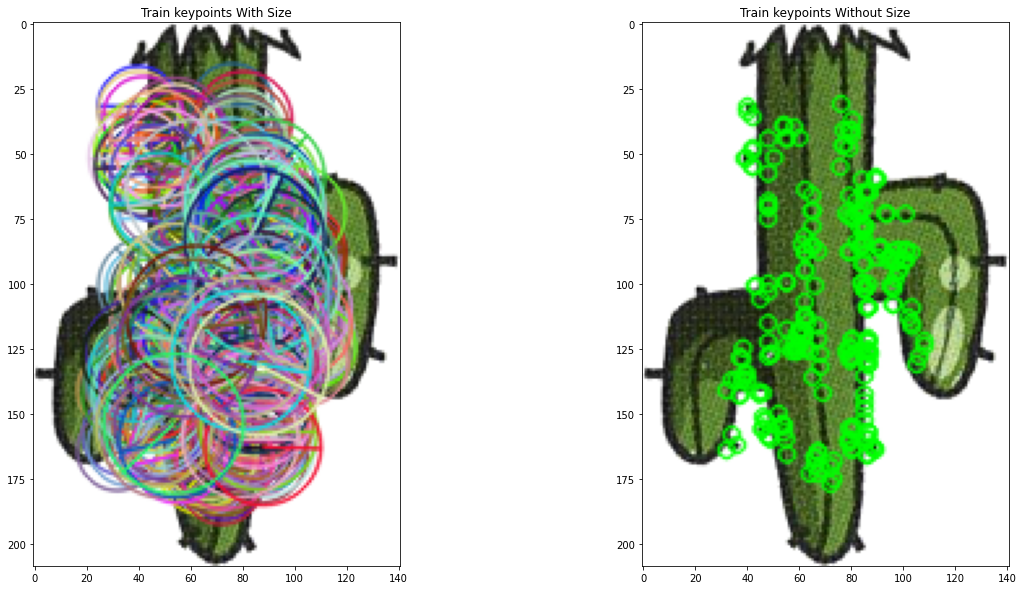

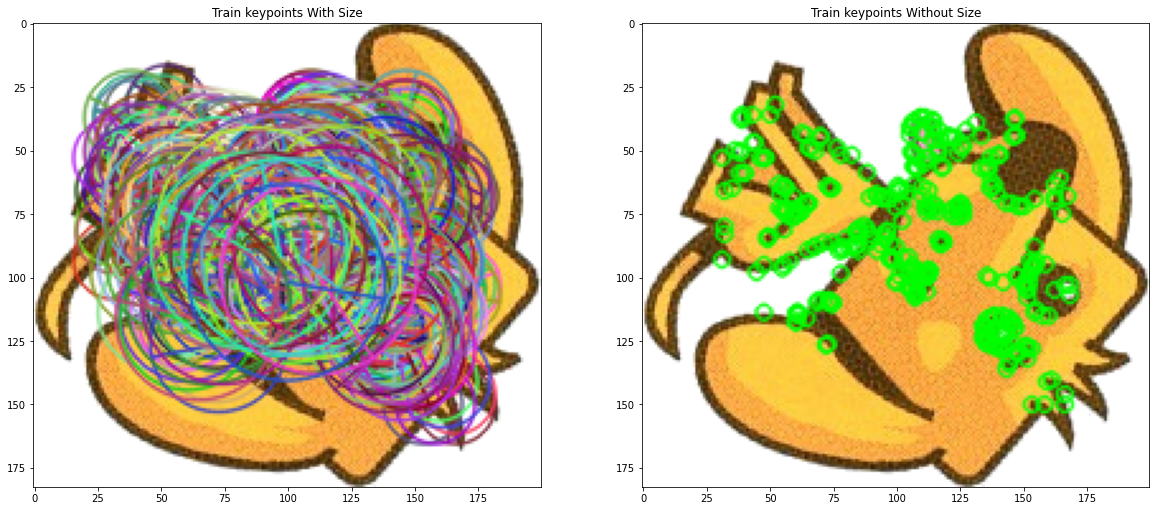

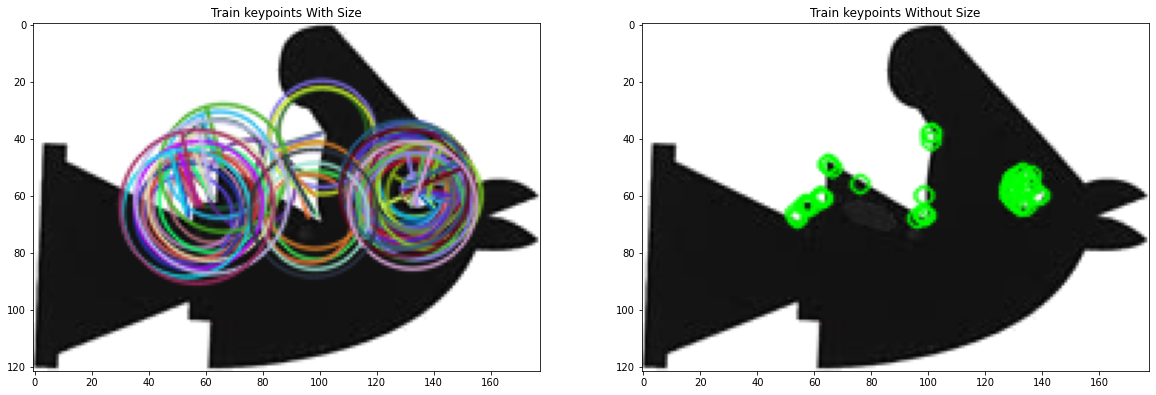

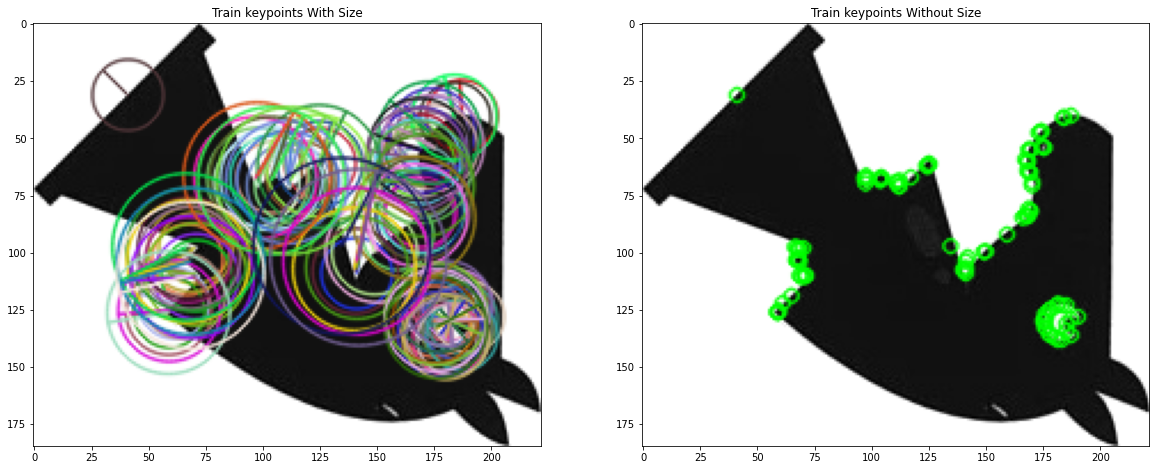

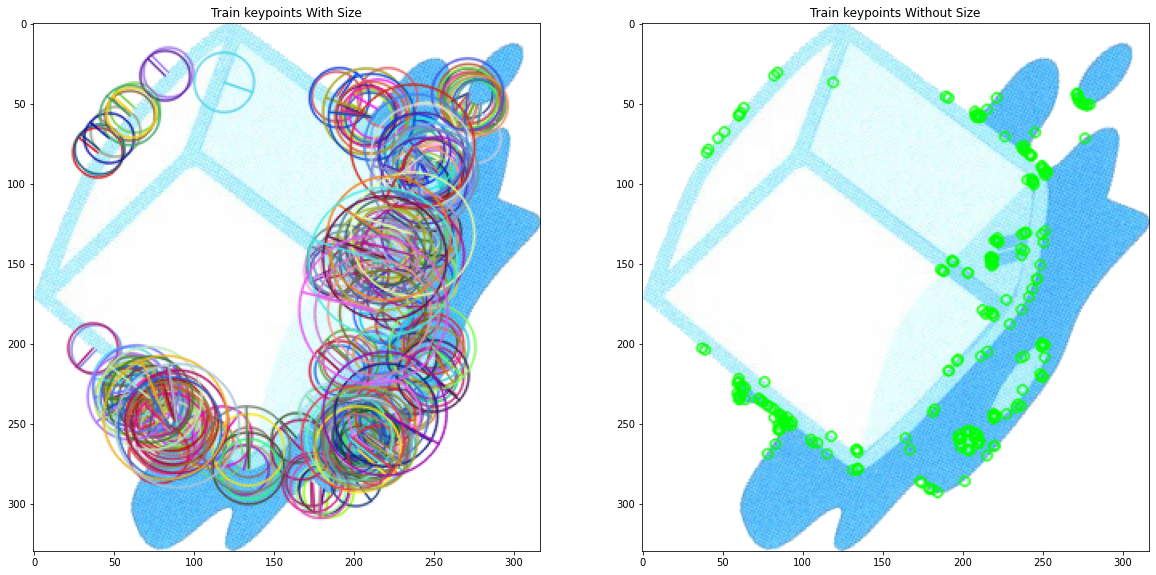

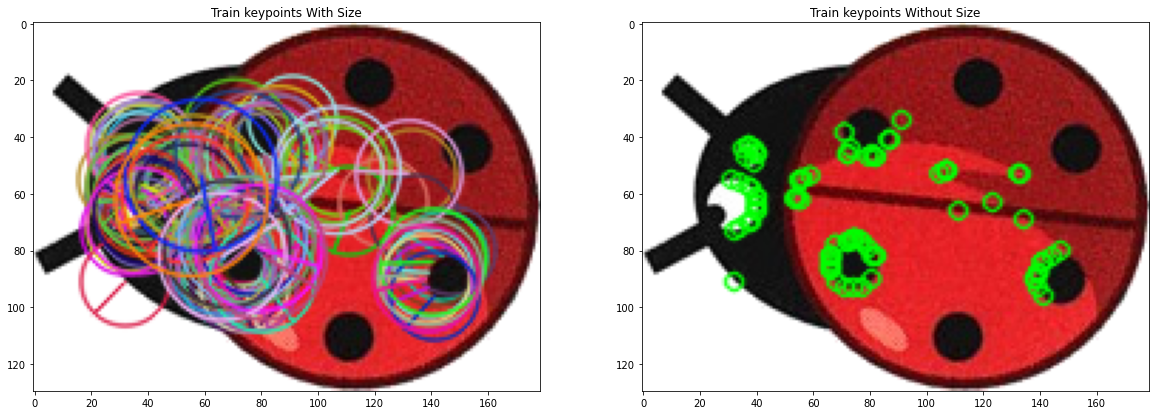

In [33]:
np.random.seed(42)
train, labels = load_dataset("dataset/train")
img_train, img_test, label_train, label_test = train_test_split(train, labels, test_size=0.2, random_state=42, stratify=labels)
orb = cv2.ORB_create()

list_descriptors = []

for img in img_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    keypoints = orb.detect(gray_img, None)
    keypoints, descriptors = orb.compute(gray_img, keypoints)
    
    # Draw key points
    # print("Number of Keypoints Detected In The Training Image: ", len(keypoints))
    keypoints_without_size = np.copy(img)
    keypoints_with_size = np.copy(img)
    cv2.drawKeypoints(img, keypoints, keypoints_without_size, color = (0, 255, 0))
    cv2.drawKeypoints(img, keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    fx, plots = plt.subplots(1, 2, figsize=(20,10))
    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')
    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # indices = np.random.choice(descriptors.shape[0], 50, replace=False)
    indices = np.random.randint(descriptors.shape[0], size=50)
    desc_samples = descriptors[indices]
    list_descriptors.append(desc_samples)

super_sample = np.vstack(list_descriptors)
kmeans = create_kmeans(super_sample)
